In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.ndimage import convolve1d
#%matplotlib inline
#%matplotlib notebook
#%matplotlib qt
import math as mt


def Simulate(d,lmb):
    def Function (d,lmb,x):
        f1= np.cos((np.pi*x**2)/(d*lmb))
        f2=np.sin((np.pi*x**2)/(d*lmb))
        return f1,f2

    a=-100    
    B=100
    H=0.02
    n=int((B-a)/H)
    print('Steps',n)
    func=[]
    B_=[]
    for j in range(n):
        a=-100
        b=a+(j+1)*H
        h=0.01
        steps=int((b-a)/h)
        #print(a,b,steps)
        af1,af2= Function(d ,lmb,a)
        bf1,bf2= Function(d ,lmb,b)
        cf1=[]
        cf2=[]
        B_.append(b)
        for i in range(1,steps-2):
            f1,f2= Function(d ,lmb,a+i*h)
            cf1.append(2*f1)
            cf2.append(2*f2)
        trp_meth_f1=(h/2)*(af1+bf1+np.sum(cf1))
        trp_meth_f2=(h/2)*(af2+bf2+np.sum(cf2))
        #print(pow(pow(abs(trp_meth_f1),2)+pow(abs(trp_meth_f2),2),2))
        func.append(pow(pow(abs(trp_meth_f1),2)+pow(abs(trp_meth_f2),2),2))
    return np.array(func),np.array(B_)
#func1,B1_=Simulate(338.4e3 ,0.413e-9)#/(4000*9)
#func,B_=Simulate(338.4e3 ,1.24e-9)
#func1=func1/3.5
#func=func/3.5


In [ ]:
###wavelength of photon energy

In [ ]:
import numpy as np
import scipy.constants as const
eng_ev=np.array([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]) #0.1 to 100 kev
jul=eng_ev/6.242e18
lamb=const.c*const.h/jul
print(lamb/10**-9)
print(10e3)



In [13]:
func1,B1_=Simulate(3.384e8 ,1.24e-9)

Steps 10000


In [ ]:
# 1-10 kev [1.2399395  0.61996975 0.41331317 0.30998488 0.2479879  0.20665658
# 0.17713421 0.15499244 0.13777106 0.12399395]

#func1,B1_=Simulate(3.384e8 ,1.24e-9)
#func2,B2_=Simulate(3.384e8 ,0.6199e-9)
func3,B3_=Simulate(3.384e8 ,0.4133e-9)
func4,B4_=Simulate(3.384e8 ,0.30998488e-9)
func5,B5_=Simulate(3.384e8 ,0.2479879e-9)


Steps 10000


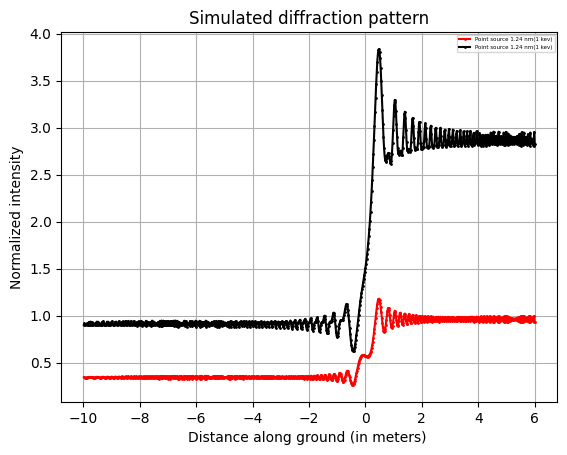

In [16]:
c_f=(func1+func2)/2
#
#print(len(func),len(B_))
#convolved_intensity = convolve1d(func, disc_intensity)/(7*80*size_d)#320
#convolved_band = convolve1d(c_f, disc_intensity)/(7*80*size_d)#320
plt.plot(B2_[4500:5300],func2[4500:5300]/3,color="red", marker="o", linestyle="-",markersize=1,label='Point source 1.24 nm(1 kev)')
plt.plot(B1_[4500:5300],c_f[4500:5300],color="black", marker="o", linestyle="-",markersize=1,label='Point source 1.24 nm(1 kev)')
#plt.plot(B_[4500:5500],convolved_intensity[4500:5500],color="blue", marker="o", linestyle="-",markersize=1,label=f'Convolved {size_d} milliarcsecond object ')
#plt.plot(B_[4500:5500],convolved_band[4500:5500],color="yellow", marker="o", linestyle="-",markersize=1,label=f'Convolved {size_d} milliarcsecond object ')
plt.grid(True)
plt.legend(loc='best',fontsize=4,frameon=True)
plt.xlabel('Distance along ground (in meters) ')
plt.ylabel('Normalized intensity')
plt.title('Simulated diffraction pattern')
plt.savefig('Convolved_plot.jpg',dpi=800)
plt.show()
